# Exploratory data analysis

In [0]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt  
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
import seaborn as sns; sns.set(color_codes=True)

In [22]:
data = pd.read_csv('PricePredict.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Answers for problem 1:

### 1. The data contains 205 samples and each sample has 26 attributes

In [23]:
data.shape

(205, 26)

### 2. Data types of 26 attributes

In [24]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### 3. Descriptive statistics for the numerical data

In [25]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### 4. Check null values for the objective data


In [68]:
obj_data = data.select_dtypes(include=['object']).copy()
obj_data.head()


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500,17450


In [27]:
obj_data[obj_data.isnull().any(axis=1)]

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price


# Data preprocessing

## Answers for problem 2:
In order to get an appropriate matrix to do linear regression, I decide to clean data first including converting strings to float and encoding categorical data. 

### 1. Convert the numbers with string format to float

In [0]:
def get_clean_numdata(columnname):
  lst = data[columnname].tolist() # load the column data
  new_lst = []  
  val_lst = []  
  for i in lst: # scan the list and convert the strings to float 
    try:
      val_lst.append(float(i))
    except:
      continue
  avg = np.mean(val_lst) # replace the '?' values with mean value

  for i in lst:
    try:
      new_lst.append(float(i))
    except:
      new_lst.append(avg)
      
  obj_data[columnname] = new_lst



In [29]:
# This five columns only has up to 4 missing values. So i just replace the '?' with mean value

num_col_lst = ['bore','stroke','horsepower','peak-rpm','price']

for i in num_col_lst:
  get_clean_numdata(i)

obj_data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111.0,5000.0,13495.0
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111.0,5000.0,16500.0
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154.0,5000.0,16500.0
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102.0,5500.0,13950.0
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115.0,5500.0,17450.0


In [30]:
data["normalized-losses"].value_counts()[:10]

?      41
161    11
91      8
150     7
104     6
134     6
128     6
74      5
85      5
65      5
Name: normalized-losses, dtype: int64

In [31]:
data[data["normalized-losses"] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


#### As the missing values in normalized-losses are over 20%, and these null values are randomly distributed. I drop this column at here.

In [0]:
obj_data.drop(columns=['normalized-losses'], inplace = True)

### 2. Convert numbers in words formant to float

In [33]:
obj_data["num-of-doors"].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [34]:
# There is evidence show the significant difference between four and two. 
# So i assign the first half of '?'s with 4 and the other half of '?'s with 2

dict_catgs_d = {'four':4, 'two':2}
num_doors = obj_data['num-of-doors'].tolist()
cnt = 0
for i in num_doors:
  if i == '?':
    cnt += 1 # calculate total '?'s in num-of-doors
point = 0
new_num_doors = []
for i in num_doors:
  if i in dict_catgs_d:
    new_num_doors.append(dict_catgs_d[i])
  elif i == '?' and point != round(cnt/2): # assign first half with 4
    new_num_doors.append(4)
  else:
    new_num_doors.append(2) # assign the other half with 2

obj_data['num-of-doors'] = new_num_doors
obj_data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111.0,5000.0,13495.0
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111.0,5000.0,16500.0
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154.0,5000.0,16500.0
3,audi,gas,std,4,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102.0,5500.0,13950.0
4,audi,gas,std,4,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115.0,5500.0,17450.0


In [35]:
dict_catgs_c = {"num-of-cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,"two": 2, "twelve": 12, "three":3 }}
obj_data.replace(dict_catgs_c, inplace=True)
obj_data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,3.47,2.68,111.0,5000.0,13495.0
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,3.47,2.68,111.0,5000.0,16500.0
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,2.68,3.47,154.0,5000.0,16500.0
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi,3.19,3.40,102.0,5500.0,13950.0
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi,3.19,3.40,115.0,5500.0,17450.0


### 3. Categorical data encoding

In [36]:
# Before apply different kinds of encoding methods
# Check how many unique categories per column will be helpful

ojb_col_lst = ['make', 'fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type', 'fuel-system']
num_types = []
for i in ojb_col_lst:
  num_types.append(len(set(obj_data[i].tolist())))
zip_col_types = list(zip(ojb_col_lst,num_types))
sort_zip_col_types = sorted(zip_col_types, key=lambda x:x[1], reverse=True)
print(sort_zip_col_types)

[('make', 22), ('fuel-system', 8), ('engine-type', 7), ('body-style', 5), ('drive-wheels', 3), ('fuel-type', 2), ('aspiration', 2), ('engine-location', 2)]


#### I will use **one-hot encoding** on columns with categories less than 4, **label encoding** on less than 7, and **binary encoding** on else.

#### 3.1 One-hot encoding

In [37]:
# In this case, we have columns 'drive-wheels', 'fuel-type', 'aspiration', and 'engine-location'.

ont_hot_df = pd.get_dummies(obj_data, columns=['drive-wheels', 'fuel-type', 'aspiration', 'engine-location'], prefix=['drive', 'fuel', 'aspi', 'engine'])
ont_hot_df.head()

,make,num-of-doors,body-style,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_gas,aspi_std,aspi_turbo,engine_front,engine_rear
0,alfa-romero,2,convertible,dohc,4,mpfi,3.47,2.68,111.0,5000.0,13495.0,0,0,1,0,1,1,0,1,0
1,alfa-romero,2,convertible,dohc,4,mpfi,3.47,2.68,111.0,5000.0,16500.0,0,0,1,0,1,1,0,1,0
2,alfa-romero,2,hatchback,ohcv,6,mpfi,2.68,3.47,154.0,5000.0,16500.0,0,0,1,0,1,1,0,1,0
3,audi,4,sedan,ohc,4,mpfi,3.19,3.40,102.0,5500.0,13950.0,0,1,0,0,1,1,0,1,0
4,audi,4,sedan,ohc,5,mpfi,3.19,3.40,115.0,5500.0,17450.0,1,0,0,0,1,1,0,1,0


#### 3.2 Label encoding

In [38]:
# In this case, we only have column 'body-style'.

LE = LabelEncoder()
ont_hot_df["body_encode"] = LE.fit_transform(ont_hot_df["body-style"])
ont_hot_df[["body-style", "body_encode"]].head(10)

,body-style,body_encode
0,convertible,0
1,convertible,0
2,hatchback,2
3,sedan,3
4,sedan,3
5,sedan,3
6,sedan,3
7,wagon,4
8,sedan,3
9,hatchback,2


#### 3.3 Binary encoding

In [39]:
# In this case, we have columns 'make', 'fuel-system', and 'engine-type'.

ont_hot_df_ce = ont_hot_df.copy()

BE = ce.BinaryEncoder(cols=['make', 'fuel-system', 'engine-type'])
binary_df = BE.fit_transform(ont_hot_df_ce)

binary_df.head()


,make_0,make_1,make_2,make_3,make_4,make_5,num-of-doors,body-style,engine-type_0,engine-type_1,engine-type_2,engine-type_3,num-of-cylinders,fuel-system_0,fuel-system_1,fuel-system_2,fuel-system_3,bore,stroke,horsepower,peak-rpm,price,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_gas,aspi_std,aspi_turbo,engine_front,engine_rear,body_encode
0,0,0,0,0,0,1,2,convertible,0,0,0,1,4,0,0,0,1,3.47,2.68,111.0,5000.0,13495.0,0,0,1,0,1,1,0,1,0,0
1,0,0,0,0,0,1,2,convertible,0,0,0,1,4,0,0,0,1,3.47,2.68,111.0,5000.0,16500.0,0,0,1,0,1,1,0,1,0,0
2,0,0,0,0,0,1,2,hatchback,0,0,1,0,6,0,0,0,1,2.68,3.47,154.0,5000.0,16500.0,0,0,1,0,1,1,0,1,0,2
3,0,0,0,0,1,0,4,sedan,0,0,1,1,4,0,0,0,1,3.19,3.40,102.0,5500.0,13950.0,0,1,0,0,1,1,0,1,0,3
4,0,0,0,0,1,0,4,sedan,0,0,1,1,5,0,0,0,1,3.19,3.40,115.0,5500.0,17450.0,1,0,0,0,1,1,0,1,0,3


### 4. Final cleaned data

In [40]:
# Remove the body-style column because we transform it to body_encode

final_obj_data = binary_df.drop(columns=['body-style'])
final_obj_data.head()

,make_0,make_1,make_2,make_3,make_4,make_5,num-of-doors,engine-type_0,engine-type_1,engine-type_2,engine-type_3,num-of-cylinders,fuel-system_0,fuel-system_1,fuel-system_2,fuel-system_3,bore,stroke,horsepower,peak-rpm,price,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_gas,aspi_std,aspi_turbo,engine_front,engine_rear,body_encode
0,0,0,0,0,0,1,2,0,0,0,1,4,0,0,0,1,3.47,2.68,111.0,5000.0,13495.0,0,0,1,0,1,1,0,1,0,0
1,0,0,0,0,0,1,2,0,0,0,1,4,0,0,0,1,3.47,2.68,111.0,5000.0,16500.0,0,0,1,0,1,1,0,1,0,0
2,0,0,0,0,0,1,2,0,0,1,0,6,0,0,0,1,2.68,3.47,154.0,5000.0,16500.0,0,0,1,0,1,1,0,1,0,2
3,0,0,0,0,1,0,4,0,0,1,1,4,0,0,0,1,3.19,3.40,102.0,5500.0,13950.0,0,1,0,0,1,1,0,1,0,3
4,0,0,0,0,1,0,4,0,0,1,1,5,0,0,0,1,3.19,3.40,115.0,5500.0,17450.0,1,0,0,0,1,1,0,1,0,3


In [41]:
num_data = data.select_dtypes(include=['int64','float64']).copy()
num_data.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


In [89]:
cleaned_data = pd.concat([final_obj_data, num_data], axis=1, sort=False)
cleaned_data.head()

,make_0,make_1,make_2,make_3,make_4,make_5,num-of-doors,engine-type_0,engine-type_1,engine-type_2,engine-type_3,num-of-cylinders,fuel-system_0,fuel-system_1,fuel-system_2,fuel-system_3,bore,stroke,horsepower,peak-rpm,price,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_gas,aspi_std,aspi_turbo,engine_front,engine_rear,body_encode,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,0,0,0,0,0,1,2,0,0,0,1,4,0,0,0,1,3.47,2.68,111.0,5000.0,13495.0,0,0,1,0,1,1,0,1,0,0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,0,0,0,0,0,1,2,0,0,0,1,4,0,0,0,1,3.47,2.68,111.0,5000.0,16500.0,0,0,1,0,1,1,0,1,0,0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,0,0,0,0,0,1,2,0,0,1,0,6,0,0,0,1,2.68,3.47,154.0,5000.0,16500.0,0,0,1,0,1,1,0,1,0,2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,0,0,0,0,1,0,4,0,0,1,1,4,0,0,0,1,3.19,3.40,102.0,5500.0,13950.0,0,1,0,0,1,1,0,1,0,3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,0,0,0,0,1,0,4,0,0,1,1,5,0,0,0,1,3.19,3.40,115.0,5500.0,17450.0,1,0,0,0,1,1,0,1,0,3,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


In [43]:
cleaned_data.shape

(205, 41)

In [44]:
cleaned_data.describe()

,make_0,make_1,make_2,make_3,make_4,make_5,num-of-doors,engine-type_0,engine-type_1,engine-type_2,engine-type_3,num-of-cylinders,fuel-system_0,fuel-system_1,fuel-system_2,fuel-system_3,bore,stroke,horsepower,peak-rpm,price,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_gas,aspi_std,aspi_turbo,engine_front,engine_rear,body_encode,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.0,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.0,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.0,0.390244,0.380488,0.64878,0.429268,0.453659,3.131707,0.0,0.156098,0.863415,0.804878,4.380488,0.043902,0.170732,0.439024,0.565854,3.329751,3.255423,104.256158,5125.369458,13207.129353,0.043902,0.585366,0.370732,0.097561,0.902439,0.819512,0.180488,0.985366,0.014634,2.614634,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,0.0,0.488999,0.486695,0.47852,0.496183,0.499067,0.993715,0.0,0.363836,0.344250,0.397265,1.080854,0.205380,0.377195,0.497483,0.496858,0.270844,0.313597,39.519211,476.979093,7868.768212,0.205380,0.493865,0.484183,0.297446,0.297446,0.385535,0.385535,0.120377,0.120377,0.859081,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.540000,2.070000,48.000000,4150.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.0,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.150000,3.110000,70.000000,4800.000000,7788.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,0.0,0.000000,0.000000,1.00000,0.000000,0.000000,4.000000,0.0,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,3.310000,3.290000,95.000000,5200.000000,10595.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000,0.0,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000,1.000000,3.580000,3.410000,116.000000,5500.000000,16500.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000,0.0,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,3.940000,4.170000,288.000000,6600.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [0]:
# As we can see, all the data in the make_0 and engine-type_0 columns are zeros. So i drop the make_0 and engine-type_0 from the result
cleaned_data = cleaned_data.drop(columns=['make_0', 'engine-type_0'])

#### The matrix is the cleaned-data that drop price column.
#### The vector is the price column.

# Linear Regression

### 1. Linear Regression without regularizer

### Answer for problem 3: Using train_test_split function from sklearn

In [0]:
X = cleaned_data.drop(columns=['price'])
y = cleaned_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Answer for problem 4: Perform linear regression, predict the target values and make plots. 

In [0]:
# build a function to train the data and generate predicted values and accuracy

def get_acc(model, X_train, X_test, y_train, y_test):
  regressor = model  
  regressor.fit(X_train, y_train) 
  score = regressor.score(X_test, y_test)
  y_pred = regressor.predict(X_test)
  return score,y_pred

In [0]:
# As the X contains multiple features, I will find the most important feature that determine the price to make plots.

def get_top_cols(cleaned_data,model):
  coef = [round(abs(i), 4) for i in model.coef_]
  coef_dict = []
  for k,v in enumerate(coef):
    coef_dict.append((k,v))

  sort_coef = sorted(coef_dict, key=lambda x:x[1], reverse=True)

  top_5_cols = [i[0] for i in sort_coef][:5]
  top_5_cols = [cleaned_data.columns[i] for i in top_5_cols]
  return top_5_cols

In [49]:
model = LinearRegression()  # build LR model 
score,y_pred = get_acc(model, X_train, X_test, y_train, y_test) 

LR_top_5_cols = get_top_cols(cleaned_data,model)

print('LR score: ', score)
print('Top 5 important LR features: ', LR_top_5_cols)

LR score:  0.8349955041473828
Top 5 important LR features:  ['aspi_turbo', 'engine_front', 'bore', 'make_3', 'drive_rwd']


In [50]:
# comparison between actual values and predicted values
metric_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
metric_df.head()

,Actual,Predicted
15,30760.000000,26764.369131
9,13207.129353,18404.606329
100,9549.000000,8215.193696
132,11850.000000,13303.625402
68,28248.000000,29539.359215


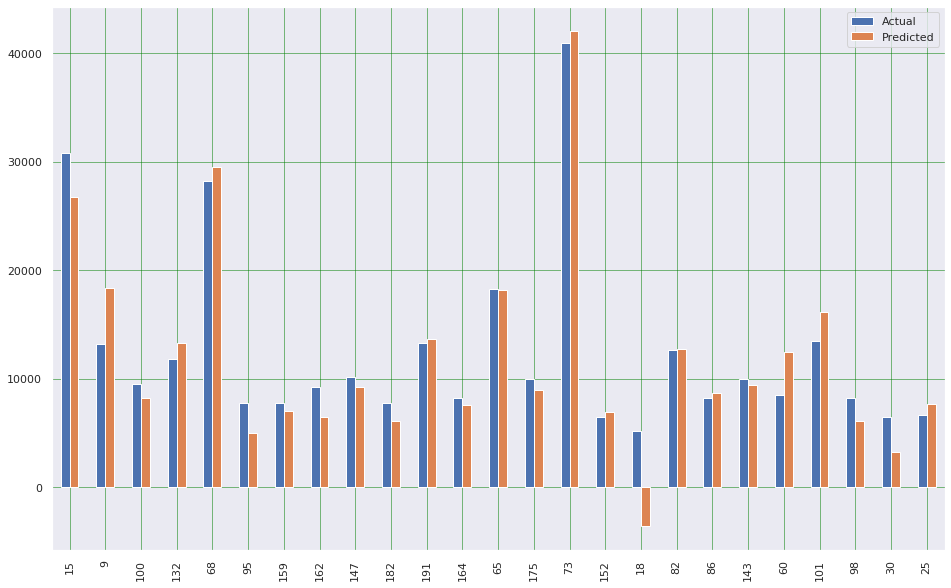

In [52]:
df1 = metric_df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Notes: Since the data is not standardized. The coefficient value changes greatly while the importance of the variable remains constant. At here, larger coefficients don’t necessarily identify more important predictor variables.

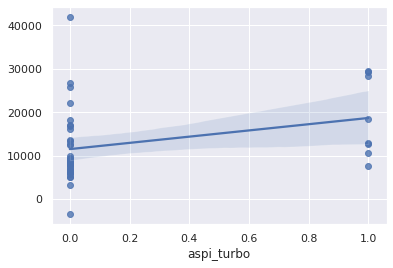

In [53]:
# Regression plot of the first important feature 'aspi_turbo' vs 'price'
sns.regplot(x=X_test['aspi_turbo'], y=y_pred)

### 2. Linear Regression with L2 regularizer

### Answer for problem 5: Repeat problem 4 with L2 regularization

In [66]:
# find an appropriate alpha for Ridge
cross_val_scores_ridge = [] 
alpha = [] 

for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, X, y, cv = 10) 
    avg_cross_val_score = np.mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

0.25 : -0.1311283715157885
0.5 : 5.183213918525553
0.75 : 9.167754691138882
1.0 : 12.276976558877665
1.25 : 14.746260456896726
1.5 : 16.732411817147785
1.75 : 18.344350405159727
2.0 : 19.660203632336113


In [55]:

model_l2 = Ridge(alpha = 2) 
score_l2, y_pred_l2 = get_acc(model_l2,  X_train, X_test, y_train, y_test)

LR_l2_top_5_cols = get_top_cols(cleaned_data, model_l2)

print('LR score: ', score_l2)
print('Top 5 important LR features: ', LR_l2_top_5_cols)


LR score:  0.8411265695572592
Top 5 important LR features:  ['aspi_turbo', 'engine_front', 'make_3', 'bore', 'stroke']


### Notes: Even though the score is now better than the LR without L2 regularizer. Data is still not standardized, which means regression plot is still not as we expected.

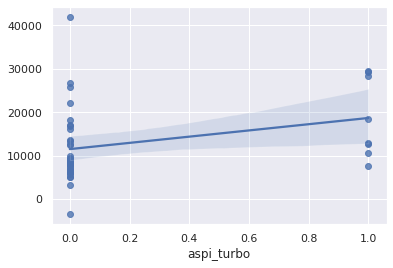

In [57]:
sns.regplot(x=X_test['aspi_turbo'], y=y_pred)

### 3. Linear Regression with normalization and without L2 regularizer

### Answer for problem 6: 

In [59]:
# Using MinMaxScaler function from sklearn to normalize the data
from sklearn import preprocessing
col_names = list(cleaned_data.columns)
norm_val = cleaned_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
norm_val_scaled = min_max_scaler.fit_transform(norm_val)
norm_df = pd.DataFrame(norm_val_scaled)
norm_df.columns = col_names
norm_df.head()

,make_1,make_2,make_3,make_4,make_5,num-of-doors,engine-type_1,engine-type_2,engine-type_3,num-of-cylinders,fuel-system_0,fuel-system_1,fuel-system_2,fuel-system_3,bore,stroke,horsepower,peak-rpm,price,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_gas,aspi_std,aspi_turbo,engine_front,engine_rear,body_encode,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.2,0.0,0.0,0.0,1.0,0.664286,0.290476,0.262500,0.346939,0.207959,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.00,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.1250,0.222222,0.289474
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.2,0.0,0.0,0.0,1.0,0.664286,0.290476,0.262500,0.346939,0.282558,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.00,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.1250,0.222222,0.289474
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.4,0.0,0.0,0.0,1.0,0.100000,0.666667,0.441667,0.346939,0.282558,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.50,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.1250,0.166667,0.263158
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.2,0.0,0.0,0.0,1.0,0.464286,0.633333,0.225000,0.551020,0.219254,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.75,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.1875,0.305556,0.368421
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.3,0.0,0.0,0.0,1.0,0.464286,0.633333,0.279167,0.551020,0.306142,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.75,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.0625,0.138889,0.157895


In [0]:
# generate new train and test data

X = norm_df.drop(columns=['price'])
y = norm_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# perform LR on the new data
norm_model = LinearRegression()
norm_score,norm_y_pred = get_acc(norm_model,  X_train, X_test, y_train, y_test)

norm_LR_top_5_cols = get_top_cols(cleaned_data, norm_model)

print('LR score: ', norm_score)
print('Top 5 important LR features: ', norm_LR_top_5_cols)

LR score:  0.8349955041473879
Top 5 important LR features:  ['curb-weight', 'num-of-cylinders', 'horsepower', 'height', 'aspi_turbo']


### Notes: As the below figure showed, the most dominated feature fit the target value pretty good after normalization.

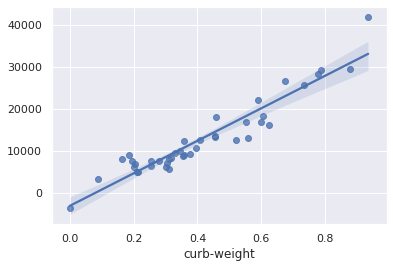

In [63]:
sns.regplot(x=X_test['curb-weight'], y=y_pred)

### 4. Linear Regression with normalization and with L2 regularizer

In [64]:
norm_model_l2 = Ridge(alpha = 2) 
norm_score_l2, norm_y_pred_l2 = get_acc(norm_model_l2,  X_train, X_test, y_train, y_test)

LR_l2_top_5_cols = get_top_cols(cleaned_data, norm_model_l2)

print('LR score: ', score_l2)
print('Top 5 important LR features: ', LR_l2_top_5_cols)

LR score:  0.8411265695572592
Top 5 important LR features:  ['curb-weight', 'aspi_turbo', 'engine_front', 'height', 'num-of-cylinders']


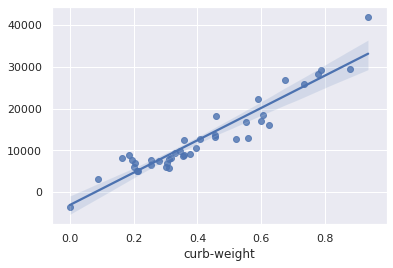

In [65]:
sns.regplot(x=X_test['curb-weight'], y=y_pred)

## One more thing:
### Using linear regression to predict the '?'s in "normalized-losses" column instead of removing it.

In [92]:
cleaned_data["normalized-losses"] = obj_data["normalized-losses"]
cleaned_data.head()

,make_1,make_2,make_3,make_4,make_5,num-of-doors,engine-type_1,engine-type_2,engine-type_3,num-of-cylinders,fuel-system_0,fuel-system_1,fuel-system_2,fuel-system_3,bore,stroke,horsepower,peak-rpm,price,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_gas,aspi_std,aspi_turbo,engine_front,engine_rear,body_encode,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,normalized-losses
0,0,0,0,0,1,2,0,0,1,4,0,0,0,1,3.47,2.68,111.0,5000.0,13495.0,0,0,1,0,1,1,0,1,0,0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,?
1,0,0,0,0,1,2,0,0,1,4,0,0,0,1,3.47,2.68,111.0,5000.0,16500.0,0,0,1,0,1,1,0,1,0,0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,?
2,0,0,0,0,1,2,0,1,0,6,0,0,0,1,2.68,3.47,154.0,5000.0,16500.0,0,0,1,0,1,1,0,1,0,2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,?
3,0,0,0,1,0,4,0,1,1,4,0,0,0,1,3.19,3.40,102.0,5500.0,13950.0,0,1,0,0,1,1,0,1,0,3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,164
4,0,0,0,1,0,4,0,1,1,5,0,0,0,1,3.19,3.40,115.0,5500.0,17450.0,1,0,0,0,1,1,0,1,0,3,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,164


In [93]:
# using index value pairs to keep the order of normalized-losses column
tar_test_idx = list(cleaned_data[cleaned_data['normalized-losses'] == '?'].index) 
tar_train_idx = list(cleaned_data[cleaned_data['normalized-losses'] != '?'].index)

training_data = cleaned_data[cleaned_data['normalized-losses'] != '?']
testing_data = cleaned_data[cleaned_data['normalized-losses'] == '?']
X_train = training_data.drop(columns=['normalized-losses'])
y_train = [float(i) for i in training_data['normalized-losses']]
X_test = testing_data.drop(columns=['normalized-losses'])

regressor = Ridge(alpha = 2) 
regressor.fit(X_train, y_train) 
# predict the '?'s in normalized-losses
y_pred = regressor.predict(X_test) 

y_test_idx_pair = list(zip(tar_test_idx, y_pred))
y_train_idx_pair = list(zip(tar_train_idx, y_train))
pred_norm_los = y_test_idx_pair + y_train_idx_pair

# according to the previous index to sort the column
pred_norm_los = sorted(pred_norm_los, key = lambda x:x[0]) 
cleaned_data['normalized-losses'] = [i[1] for i in pred_norm_los]
cleaned_data.head()

,make_1,make_2,make_3,make_4,make_5,num-of-doors,engine-type_1,engine-type_2,engine-type_3,num-of-cylinders,fuel-system_0,fuel-system_1,fuel-system_2,fuel-system_3,bore,stroke,horsepower,peak-rpm,price,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_gas,aspi_std,aspi_turbo,engine_front,engine_rear,body_encode,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,normalized-losses
0,0,0,0,0,1,2,0,0,1,4,0,0,0,1,3.47,2.68,111.0,5000.0,13495.0,0,0,1,0,1,1,0,1,0,0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,211.779253
1,0,0,0,0,1,2,0,0,1,4,0,0,0,1,3.47,2.68,111.0,5000.0,16500.0,0,0,1,0,1,1,0,1,0,0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,210.022618
2,0,0,0,0,1,2,0,1,0,6,0,0,0,1,2.68,3.47,154.0,5000.0,16500.0,0,0,1,0,1,1,0,1,0,2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,176.399648
3,0,0,0,1,0,4,0,1,1,4,0,0,0,1,3.19,3.40,102.0,5500.0,13950.0,0,1,0,0,1,1,0,1,0,3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,164.000000
4,0,0,0,1,0,4,0,1,1,5,0,0,0,1,3.19,3.40,115.0,5500.0,17450.0,1,0,0,0,1,1,0,1,0,3,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,164.000000


In [94]:
col_names = list(cleaned_data.columns)
norm_val = cleaned_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
norm_val_scaled = min_max_scaler.fit_transform(norm_val)
norm_df = pd.DataFrame(norm_val_scaled)
norm_df.columns = col_names
norm_df.head()

X = norm_df.drop(columns=['price'])
y = norm_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

norm_model_l2 = Ridge(alpha = 2) 
norm_score_l2, norm_y_pred_l2 = get_acc(norm_model_l2,  X_train, X_test, y_train, y_test)

LR_l2_top_5_cols = get_top_cols(cleaned_data, norm_model_l2)

print('LR score: ', score_l2)
print('Top 5 important LR features: ', LR_l2_top_5_cols)

LR score:  0.8411265695572592
Top 5 important LR features:  ['curb-weight', 'aspi_turbo', 'engine_front', 'height', 'num-of-cylinders']


### Funny thing is that adding the normalized-losses column does not change the result.